<div style="position:relative; height:160px;">
<img src="logoDECATUFS.png" width="500" height="500" style="position:absolute; left:-8px;">
</div>

<div style="text-align:center;font-size:17px; white-space:pre;margin-top:-35px">
        <h3>             Modelos Lineares Generalizados</h3>
        Disciplina ofertada pelo DECAT/UFS
        Código: ESTAT0092
        Nível: Graduação
        Carga horária: 60h
        Período: 2020.2
        Professor responsável e ministrante: Luiz Henrique Dore
        <h3>            Aulas 5 e 6: estimação pelo método da máxima verossimilhança</h3>
</div>

# Exemplo 9

<p style="text-align: justify; font-size:16px">
Considere o conjunto de dados <b>store.dat</b>, descrito no exemplo 2 da aula 2. O objetivo é ajustar um modelo de regressão Poisson, no qual a variável resposta é o número de clientes e as preditoras são a distância ao concorrente mais próximo e a distância à loja.
<p>

### 9.1 Leitura e visualização dos dados

In [1]:
dados<-read.table("/Dados/Google_Drive_UFS/Aulas/2020_2/MLG/Dados/store.dat",header=TRUE)
n<-dim(dados)[1] #Número de observações
p<-dim(dados)[2]+1 #Número de coeficientes (incluindo o intercepto)
head(dados) #Visualizando as primeiras observações

,numClientes,numDom,rendaMedia,idadeDom,distConc,distLoja
,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,9,606,41393,3,3.04,6.32
2,6,641,23635,18,1.95,8.89
3,28,505,55475,27,6.54,2.05
4,11,866,64646,31,1.67,5.81
5,4,599,31972,7,0.72,8.11
6,4,520,41755,23,2.24,6.81


In [2]:
numClientes<-dados[,"numClientes"]
distConc<-dados[,"distConc"]
distLoja<-dados[,"distLoja"]

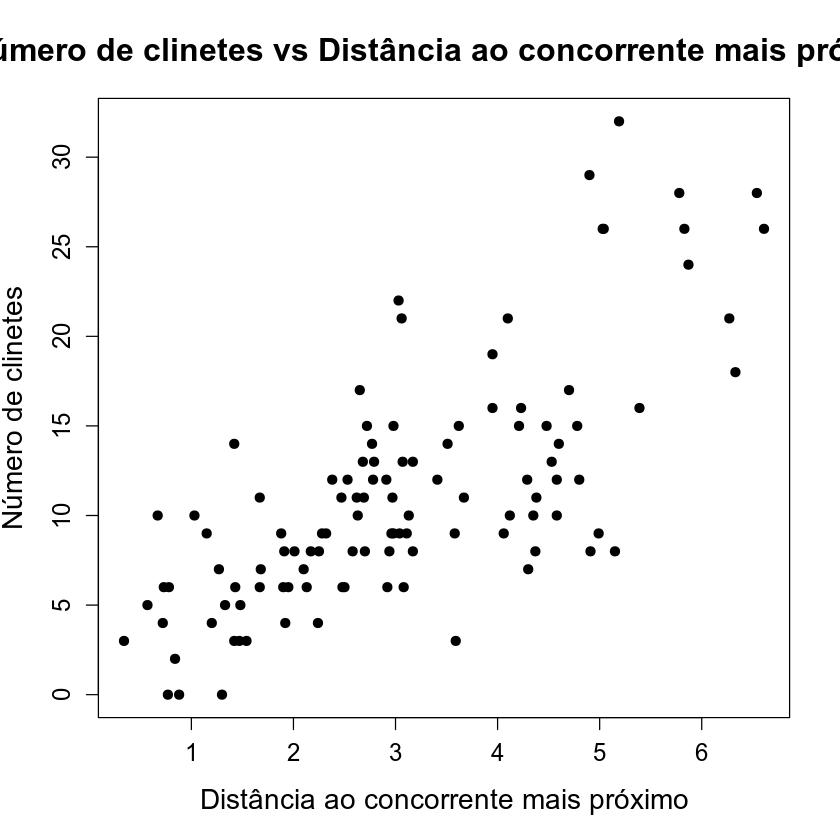

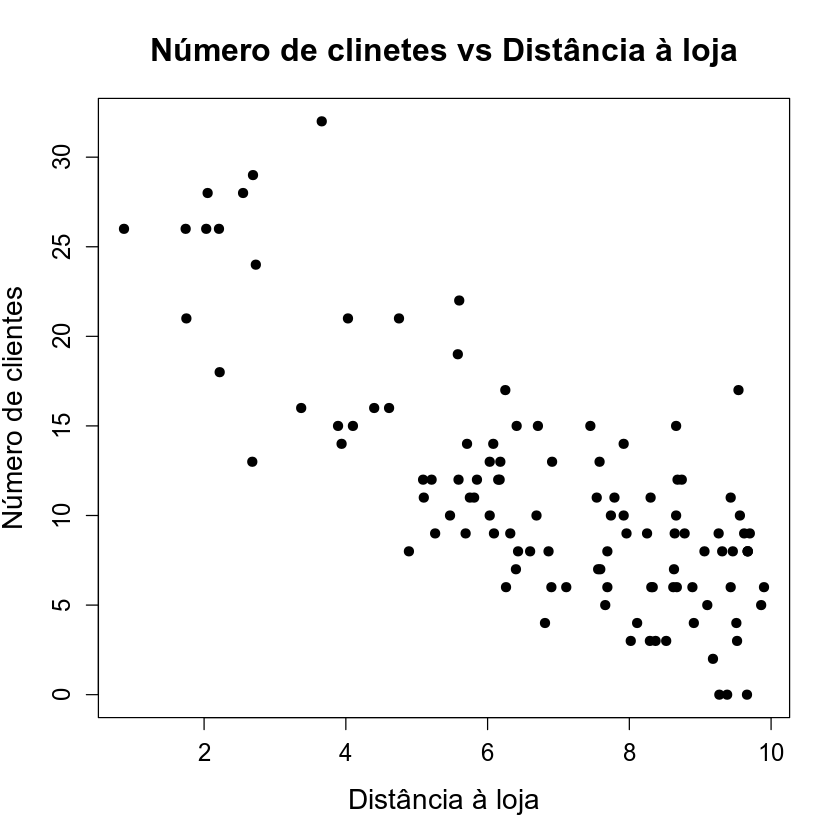

In [3]:
#Número de clientes vs Distância ao concorrente mais próximo
plot(distConc,numClientes,pch=20,cex=1.5,xlab="Distância ao concorrente mais próximo",ylab="Número de clinetes",cex.lab=1.4,cex.main=1.6,main="Número de clinetes vs Distância ao concorrente mais próximo",cex.axis=1.2)

#Número de clientes vs Distância à loja
plot(distLoja,numClientes,pch=20,cex=1.5,xlab="Distância à loja",ylab="Número de clientes",cex.lab=1.4,cex.main=1.6,main="Número de clinetes vs Distância à loja",cex.axis=1.2)

### 9.2 Formulação do modelo

<p style="text-align: justify; font-size:15px">
    <ol style="font-size:16px">
        <li>$numClientes\sim Poisson(\mu)$;</li>
        <li>$\eta=\beta_0+\beta_1\cdot distConc+\beta_2\cdot distLoja$;</li>
        <li>$\ln(\mu)=\eta$.</li>
    </ol>
</p>

### 9.3 Estimação do vetor de coeficientes de regressão $\boldsymbol{\beta}$ utilizando o algoritmo escore de Fisher

<p style="text-align: justify; font-size:16px">Gerando o vetor dos valores observados da resposta e a matriz design.</p>

In [4]:
#y=1 se o paciente sobrevive (Lived) e y=0, caso contrário (Died)
y<-as.numeric(dados[,"numClientes"])
X<-as.matrix(dados[,c("distConc","distLoja")])
X<-cbind(1,X)
head(X)

,distConc,distLoja
1,3.04,6.32
1,1.95,8.89
1,6.54,2.05
1,1.67,5.81
1,0.72,8.11
1,2.24,6.81


<p style="text-align: justify; font-size:16px">Calculando a estimativa de máxima verossimilhança de $\boldsymbol{\beta}$, usando o algoritmo escore de Fisher.</p>

<p style="text-align: justify; font-size:16px">No caso do modelo de Poisson, tem-se que $\boldsymbol{V}=\hbox{diag}\{\mu_1,\cdots,\mu_n\}$. Como a ligação é canônica, então $\mu_i=e^{\eta_i}$ e $\boldsymbol{W}=\boldsymbol{V}$. A estimativa inicial para cada $\mu_1,\cdots,\mu_n$ é a média amostral do número de clientes. Isto é, $\mu^{(0)}=(\bar{y},\bar{y}\cdots,\bar{y})^T$, onde $\bar{y}$ é a média amostral.</p>

In [5]:
mu0<-rep(mean(y),n) #Estimativa inicial para mu (vetor de médias).
eta0<-log(mu0) #Cálculo do valor inicial do vetor eta (vetor de preditores lineares)
V0<-diag(mu0) #Cálculo do valor inicial da matriz diagonal V (matriz das funções de variância)
W0<-V0 #Cálculo do valor inicial da matriz diagonal W (matriz de pesos)
V0Inv<-diag(1/mu0) #Valor inicial da inversa de V
W0Inv<-V0Inv #Valor inicial da inversa de W
z0<-eta0+((W0Inv^(1/2))%*%(V0Inv^(1/2)))%*%(y-mu0) #Cálculo do valor inicial de z
beta0<-as.numeric(solve(t(X)%*%W0%*%X)%*%(t(X)%*%W0%*%z0)) #Cálculo do valor inicial de beta

#Bloco de iteração
iterMax<-100 #Número máximo de iterações
iter<-0
conv<-FALSE
while(1){
    iter<-iter+1
    eta0<-as.numeric(X%*%beta0)  #Atualização do valor do preditor linear
    mu0<-exp(eta0) #Atualização do valor de mu
    V0<-diag(mu0) #Atualização do valor da matriz diagonal V (matriz das funções de variância)
    W0<-V0 #Atualização do valor da matriz diagonal W (matriz das funções de pesos)
    V0Inv<-diag(1/mu0) #Inversa da matriz diagonal V atualizada
    W0Inv<-V0Inv #Inversa da matriz diagonal W atualizada
    z0<-eta0+((W0Inv^(1/2))%*%(V0Inv^(1/2)))%*%(y-mu0) #Atualização do valor de z
    beta1<-as.numeric(solve(t(X)%*%W0%*%X)%*%(t(X)%*%W0%*%z0)) #Atualização de beta (vetor de coeficientes de regressão)
    #Critério de convergência: diferença máxima entre os compenentes de beta(m+1) e beta(m) menor do que 10e-5
    if(all(abs(beta0-beta1)<1e-5)){
        conv<-TRUE
        break
    }
    beta0<-beta1
    if(iter==iterMax){
        break
    }
}

if(conv){
    print(paste("O algoritmo escore de Fisher convergiu em",iter,"passos."))
    beta<-beta1 #Estimativa de máxima verossimilhança de beta
    names(beta)<-colnames(X)
    names(beta)[1]<-"Intercepto"
    eta<-X%*%beta #Estimativa de máxima verossimilhança de eta
    mu<-exp(eta)
}
if(!conv){
    print(paste("O algoritmo escore de Fisher não convergiu em",iter,"passos."))
}

[1] "O algoritmo escore de Fisher convergiu em 4 passos."


<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão.</p>

In [6]:
print(beta)

Intercepto   distConc   distLoja 
 2.5951177  0.1516029 -0.1090725 


### 9.4 Estimação dos parâmetros pelo método escore de Fisher usando a função ``glm``

<p style="text-align: justify;font-size: 16px">Carregando os pacotes necessários.</p>

<p style="text-align: justify;font-size: 16px">A função <font face="'Courier New'">glm</font> realiza o ajuste de
    um MLG. Os coeficientes de regressão são estimados pelo método da máxima verossimilhança, com o algoritmo 
    escore de Fisher. O estimador do parâmetro de dispersão depende do modelo. Os argumentos mais básicos são</p>
    <ol style="text-align: justify; font-size:16px">
        <li><font face="'Courier New'">formula</font>: especificação do preditor linear;</li>
        <li><font face="'Courier New'">family</font>: especificação da distribuição de probabilidade da resposta e da função de ligação.</li>
    </ol>
<p style="text-align: justify;font-size: 16px"> Para mais informações sobre a função <font face="'Courier 
    New'">glm</font> e seus argumentos, acesse a ajuda da função executando o comando <font face="'Courier New'">?glm</font>. Para informações sobre as distribuições de probabilidade e as funções de ligação disponíveis, 
    execute o comando <font face="'Courier New'">?family</font>.
</p>

In [7]:
aj<-glm(formula=numClientes~distConc+distLoja,family=poisson(link="log"),data=dados)
beta<-aj$coefficients

<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão.</p>

In [8]:
print(beta)

(Intercept)    distConc    distLoja 
  2.5951177   0.1516029  -0.1090725 


<p style="text-align: justify;font-size: 16px">Visualizando as respostas médias e os respectivos valores ajustados.</p>

In [9]:
muAj<-predict(aj,type="response") #Respostas médias ajustadas
head(cbind(numClientes,muAj))

,numClientes,muAj
1,9,10.661642
2,6,6.828391
3,28,28.875743
4,11,9.157594
5,4,6.169971
6,4,8.952427


<p style="text-align: justify;font-size: 16px">Visualizando a curva ajustada.</p>

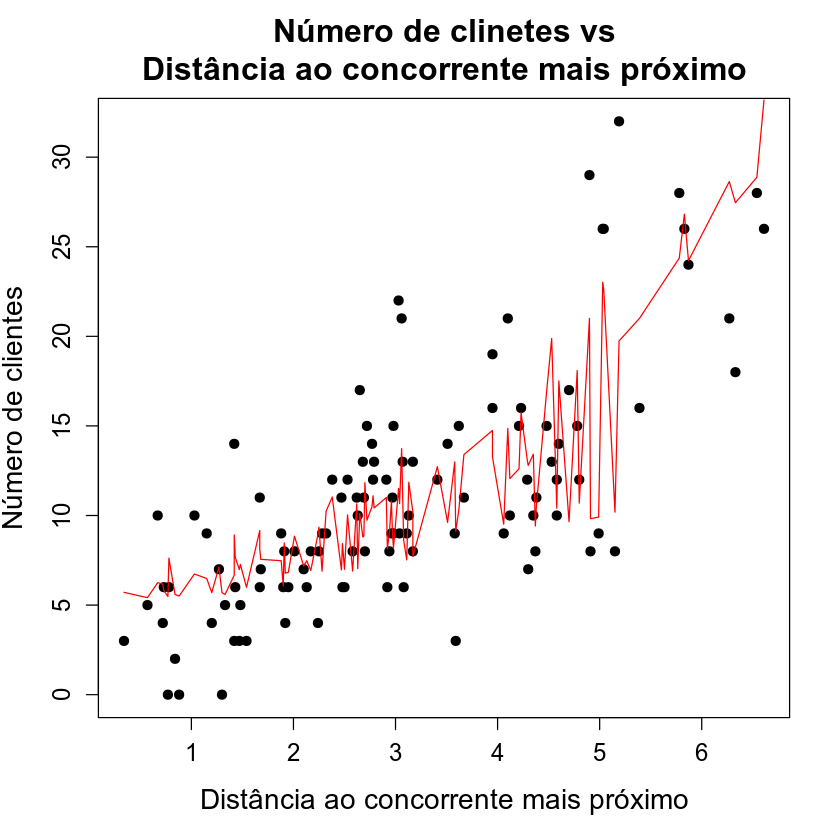

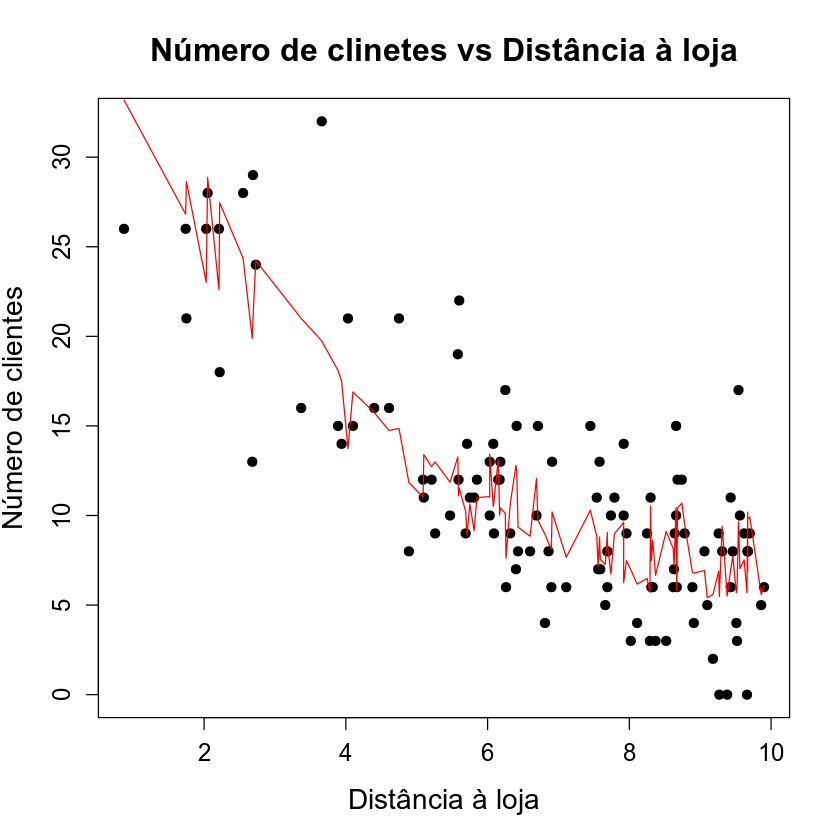

In [10]:
yLim<-c(min(c(numClientes,muAj)),max(c(numClientes,muAj)))

#Número de clientes vs Distância ao concorrente mais próximo
I<-order(distConc)
plot(distConc,numClientes,pch=20,cex=1.5,xlab="Distância ao concorrente mais próximo",ylab="Número de clientes",cex.lab=1.4,cex.main=1.6,main="Número de clinetes vs\nDistância ao concorrente mais próximo",cex.axis=1.2)
points(distConc[I],muAj[I],type="l",col="red")

#Número de clientes vs Distância à loja
I<-order(distLoja)
plot(distLoja,numClientes,pch=20,cex=1.5,xlab="Distância à loja",ylab="Número de clientes",cex.lab=1.4,cex.main=1.6,main="Número de clinetes vs Distância à loja",cex.axis=1.2)
points(distLoja[I],muAj[I],type="l",col="red")

### 9.5 Interpretação do modelo

<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão e do parâmetro de dispersão.</p>

In [11]:
beta<-aj$coefficients
print(beta)

(Intercept)    distConc    distLoja 
  2.5951177   0.1516029  -0.1090725 


<p style="text-align: justify;font-size: 16px">Equação de regressão ajustada.</p>

<p style="text-align: justify;font-size: 20px">$\hat\mu=e^{2,5951+0,1516\cdot distConc-0,1091\cdot distLoja}=e^{2,5951}\cdot e^{0,1516\cdot distConc}\cdot e^{-0,1091\cdot distLoja}$.</p>

<p style="text-align: justify;font-size: 16px">Calculando a exponencial dos coeficientes de regressão.</p>

In [12]:
print(exp(beta))

(Intercept)    distConc    distLoja 
 13.3981637   1.1636980   0.8966654 


<p style="text-align: justify; font-size:16px">Interpretando os coeficientes de regressão. </p>
<ol style="text-align: justify; font-size:16px">
    <li>Supondo que há concorrentes na região da loja ($distConc=0$), estima-se que há, em média, cerca de 
        13 clientes que moram na região da loja ($distLoja=0$).</li>
    <li>Como $\beta_1$ é positivo, quanto maior a distância ao concorrente mais próximo, maior o número médio de 
        clientes.</li>
    <li>Quando a distância ao concorrente mais próximo aumenta uma unidade, o número de clientes fica, em média, 
        cerca de 1,16 vezes maior. Isto é, o número de clientes cresce, em média, 16%.</li>
    <li>Como $\beta_2$ é negativo, quanto maior a distância à loja, menor o número médio de clientes.</li>
    <li>Quando a distância à loja aumenta uma unidade, o número de clientes fica, em média, cerca de 0,9 vezes 
        menor. Isto é, o número de clientes reduz, em média, 10%.</li>
</ol>